In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_nameyears
Estrada-1998,joseph ejercito estrada to the congress s...,Estrada-1998
Estrada-2000,transcript third joseph ejercito estradato t...,Estrada-2000
Arroyo-2001,first by gloria opening of the regular sessi...,Arroyo-2001
Arroyo-2002,transcript second by gloria macapagalarroyo ...,Arroyo-2002
Arroyo-2003,third gloria macapagalarroyo of the regul...,Arroyo-2003
Arroyo-2004,fourth gloria macapagalarroyo of the re...,Arroyo-2004
Arroyo-2005,fifth gloria macapagalarroyo of the reg...,Arroyo-2005
Arroyo-2006,sixth gloria macapagalarroyo of the regul...,Arroyo-2006
Arroyo-2007,seventh gloria macapagalarroyo of the r...,Arroyo-2007
Arroyo-2008,eighth gloria macapagalarroyo of the re...,Arroyo-2008


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_nameyears,polarity,subjectivity
Estrada-1998,joseph ejercito estrada to the congress s...,Estrada-1998,0.065895,0.434488
Estrada-2000,transcript third joseph ejercito estradato t...,Estrada-2000,0.057528,0.402601
Arroyo-2001,first by gloria opening of the regular sessi...,Arroyo-2001,0.064520,0.376522
Arroyo-2002,transcript second by gloria macapagalarroyo ...,Arroyo-2002,0.108887,0.418559
Arroyo-2003,third gloria macapagalarroyo of the regul...,Arroyo-2003,0.144337,0.420804
Arroyo-2004,fourth gloria macapagalarroyo of the re...,Arroyo-2004,0.075871,0.417197
Arroyo-2005,fifth gloria macapagalarroyo of the reg...,Arroyo-2005,0.157534,0.451927
Arroyo-2006,sixth gloria macapagalarroyo of the regul...,Arroyo-2006,0.131574,0.392029
Arroyo-2007,seventh gloria macapagalarroyo of the r...,Arroyo-2007,0.162530,0.384850
Arroyo-2008,eighth gloria macapagalarroyo of the re...,Arroyo-2008,0.118528,0.419666


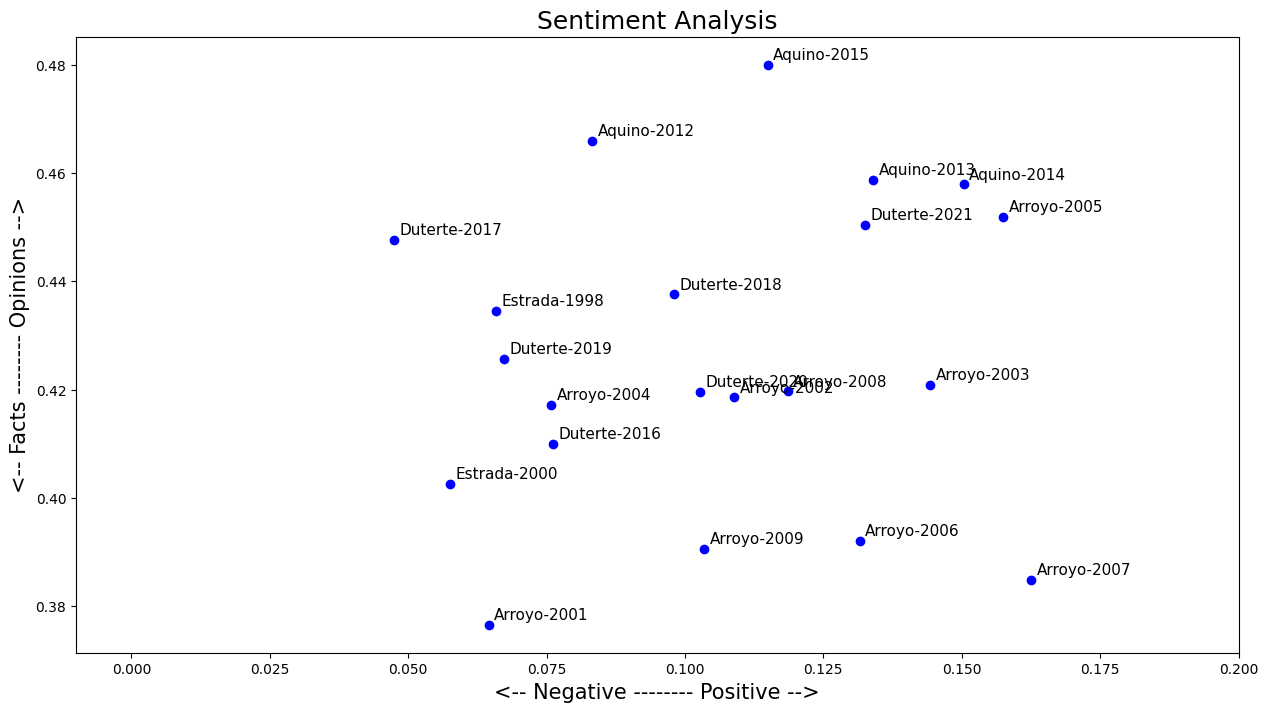

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

for index, presidents in enumerate(data.index):
    x = data.polarity.loc[presidents]
    y = data.subjectivity.loc[presidents]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_nameyears'][index], fontsize=11)
    plt.xlim(-.01, .2) 
    
plt.title('Sentiment Analysis', fontsize=18)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_nameyears,polarity,subjectivity
Estrada-1998,joseph ejercito estrada to the congress s...,Estrada-1998,0.065895,0.434488
Estrada-2000,transcript third joseph ejercito estradato t...,Estrada-2000,0.057528,0.402601
Arroyo-2001,first by gloria opening of the regular sessi...,Arroyo-2001,0.064520,0.376522
Arroyo-2002,transcript second by gloria macapagalarroyo ...,Arroyo-2002,0.108887,0.418559
Arroyo-2003,third gloria macapagalarroyo of the regul...,Arroyo-2003,0.144337,0.420804
Arroyo-2004,fourth gloria macapagalarroyo of the re...,Arroyo-2004,0.075871,0.417197
Arroyo-2005,fifth gloria macapagalarroyo of the reg...,Arroyo-2005,0.157534,0.451927
Arroyo-2006,sixth gloria macapagalarroyo of the regul...,Arroyo-2006,0.131574,0.392029
Arroyo-2007,seventh gloria macapagalarroyo of the r...,Arroyo-2007,0.162530,0.384850
Arroyo-2008,eighth gloria macapagalarroyo of the re...,Arroyo-2008,0.118528,0.419666


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['    joseph ejercito estrada  to the congress session hall of the house of representatives  ang pangalawang pangulo ng republika ng pilipinas kagalanggalang na pangulo ng senado kagalanggalang na speaker ng mababang kapulungan kagalanggalang na punong hukom ng korte suprema kagalanggalang na mga miyembro ng kongreso ng pilipinas kagalanggalang na mga kagawad ng mga gabinete their excellencies of the diplomatic corps mga piling panauhin mga minamahal kong mga kababayan noong mayo onse mahigit na  milyong pilipino ang nagdesisyon na pamunuan natin ang bansa patungo sa bagong milenyo ngayon sila ang nagtatanong ano ba ang gagawin ng bagong pamunuang ito upang ihatid ang ating bansa sa bagong siglo today i stand before you with an accounting of the present and with a road map for our future paano ba tayo itatawid sa krisis na nakabalot sa ating ekonomiya nasaan na ba tayo ngayon saan ba tayo nanggaling at saan ba tayo patutungo hindi na ako magpapaliguyligoy nasa harap tayo ngayon ng mat

In [7]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.06874999999999999,
  -0.19555555555555557,
  0.10388330853174604,
  0.04297138047138046,
  0.08240740740740743,
  0.10082417582417581,
  0.03856782106782106,
  0.08494397759103642,
  0.11685714285714283,
  0.027500569605832758],
 [0.05879432075860645,
  0.039506172839506165,
  0.04660561358930925,
  0.13085566915354152,
  0.04399062049062048,
  0.10039595959595961,
  0.01720947156291983,
  0.05992588932806324,
  -0.000656565656565659,
  0.048828463203463214],
 [0.05583028083028085,
  0.08652777777777777,
  0.05539502164502165,
  0.05820707070707072,
  0.09944949494949494,
  0.02013888888888889,
  -0.03333333333333334,
  -0.024116161616161612,
  0.06768759018759019,
  0.3273809523809524],
 [0.16848370927318296,
  0.02963980463980464,
  0.17197979797979798,
  0.13960421888053468,
  0.11149891774891776,
  0.10713804713804714,
  0.04333062770562771,
  0.12690723019670389,
  0.09266513056835637,
  0.1171928916494134],
 [0.11311813186813185,
  0.22651515151515153,
  0.13472222222222222,


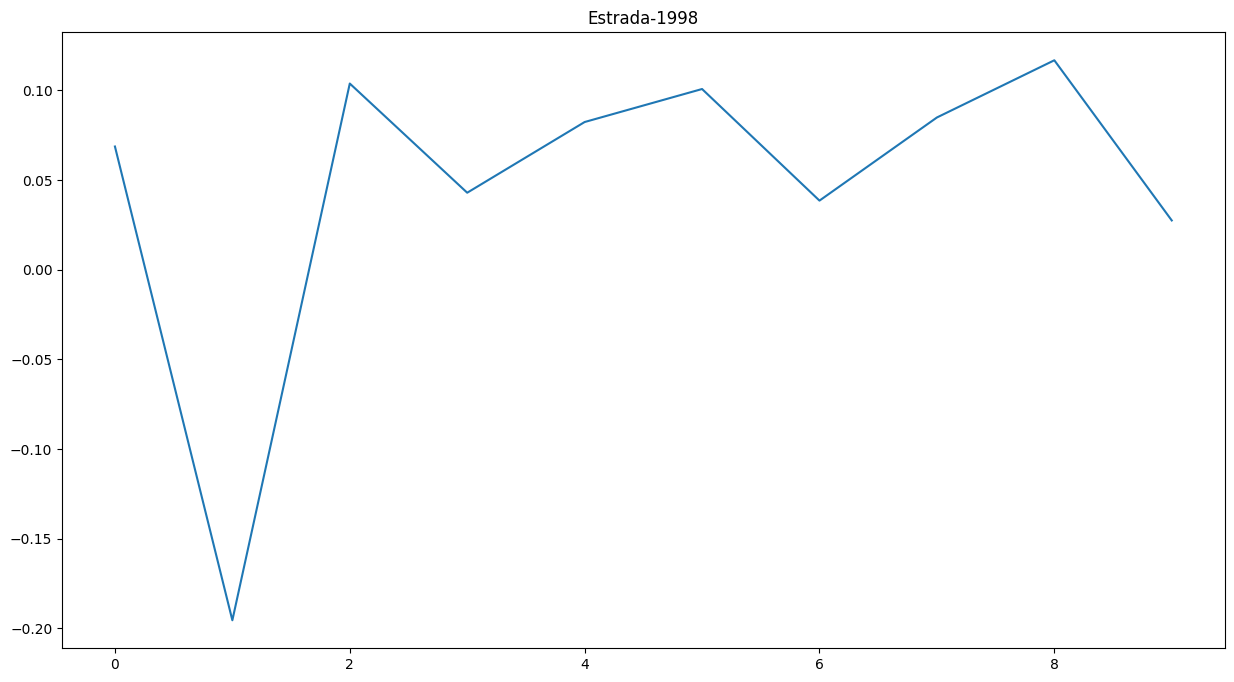

In [8]:
# Show the plot for one presidents
plt.plot(polarity_transcript[0])
plt.title(data['full_nameyears'].index[0])
plt.show()

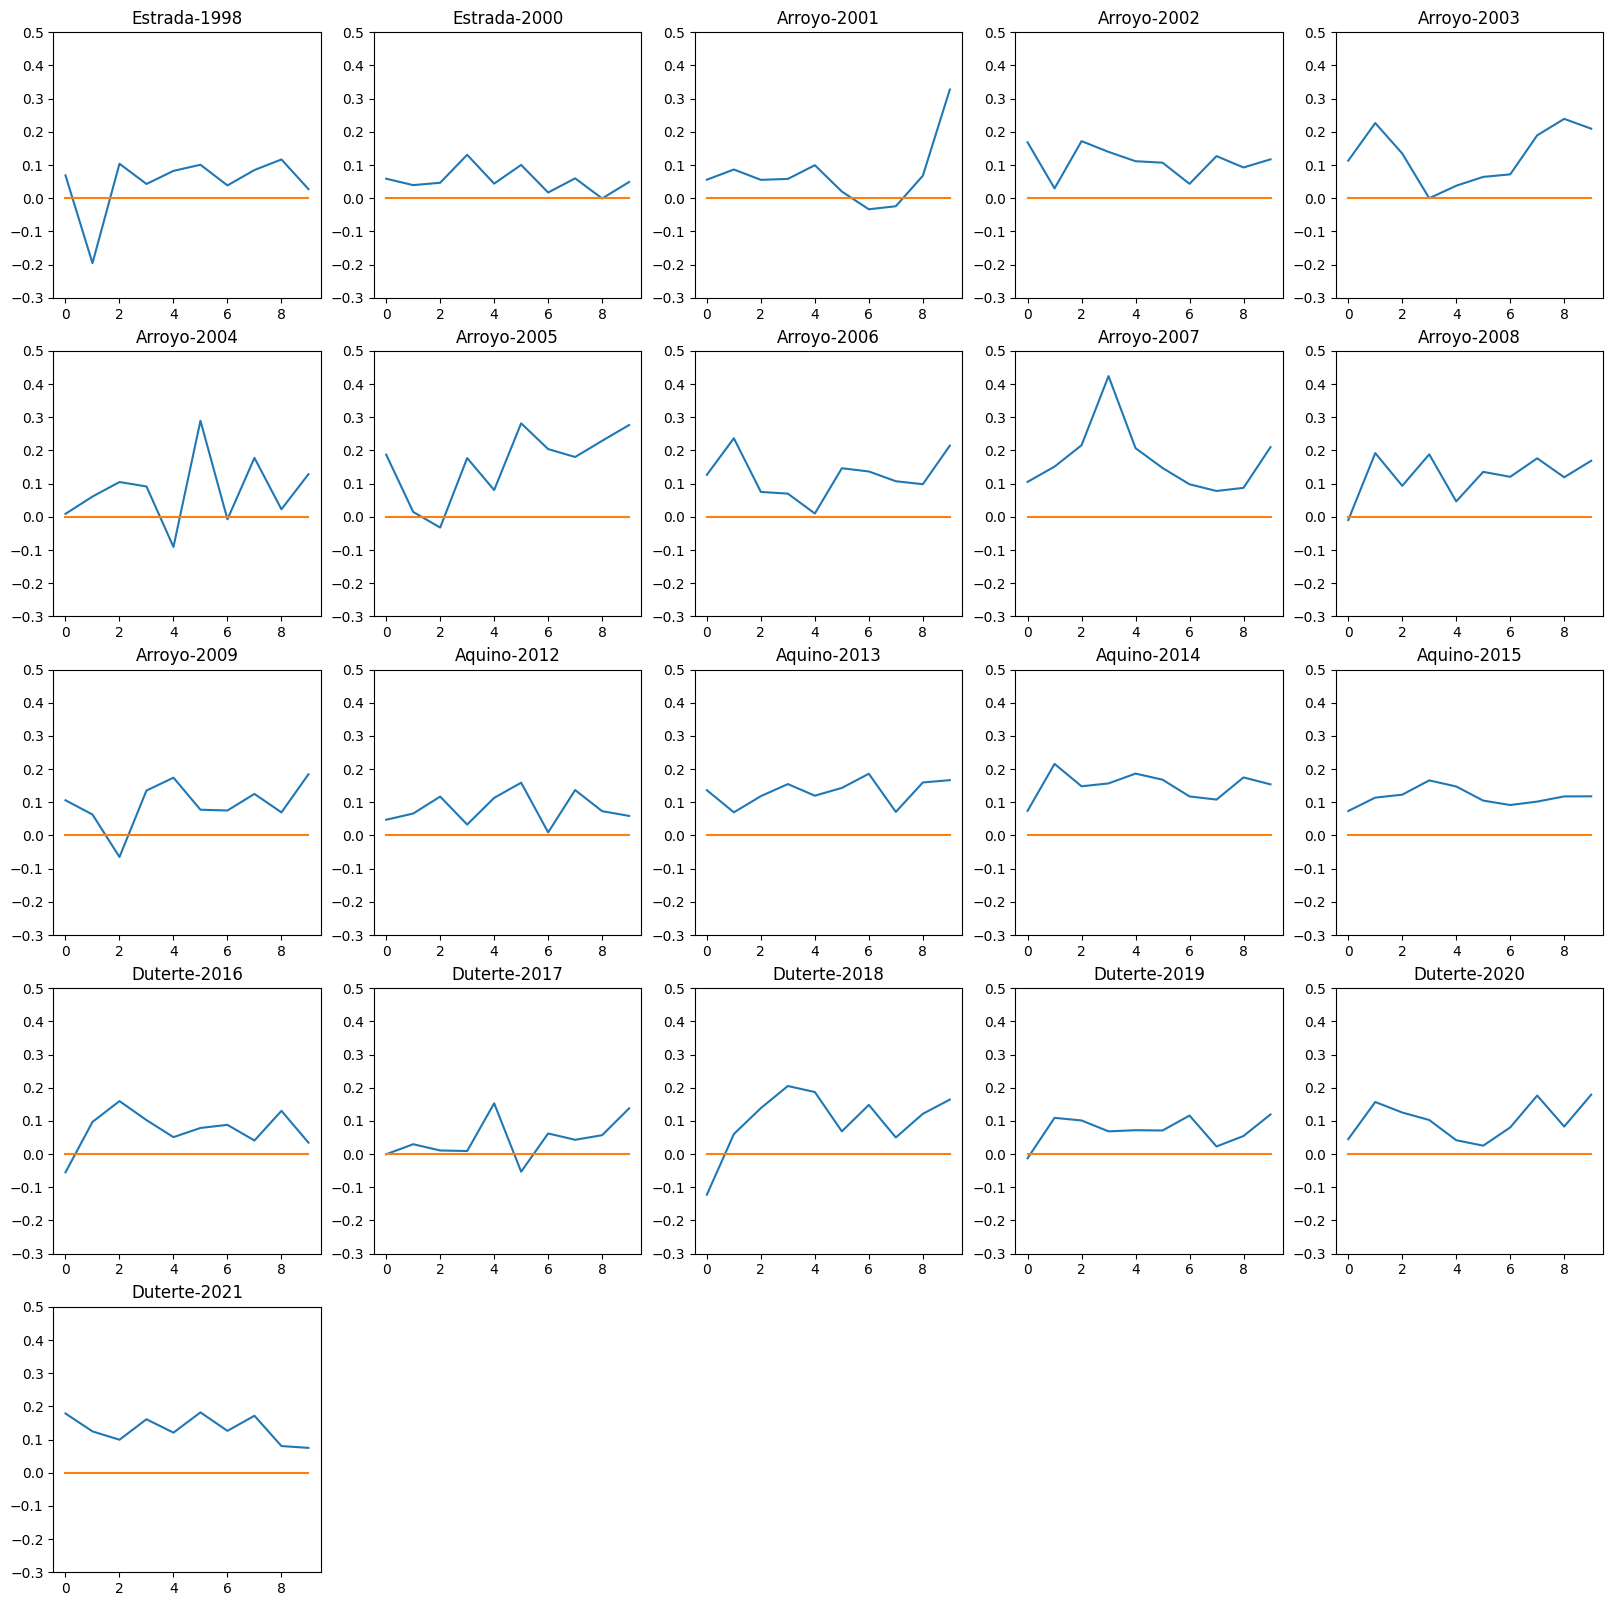

In [9]:
# Show the plot for all presidents
plt.rcParams['figure.figsize'] = [20, 20]

for index, presidents in enumerate(data.index):    
    plt.subplot(5, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_nameyears'][index])
    plt.ylim(bottom=-.3, top=.5)
    
plt.show()

In [10]:
#naive bayes

In [11]:
data

,transcript,full_nameyears,polarity,subjectivity
Estrada-1998,joseph ejercito estrada to the congress s...,Estrada-1998,0.065895,0.434488
Estrada-2000,transcript third joseph ejercito estradato t...,Estrada-2000,0.057528,0.402601
Arroyo-2001,first by gloria opening of the regular sessi...,Arroyo-2001,0.064520,0.376522
Arroyo-2002,transcript second by gloria macapagalarroyo ...,Arroyo-2002,0.108887,0.418559
Arroyo-2003,third gloria macapagalarroyo of the regul...,Arroyo-2003,0.144337,0.420804
Arroyo-2004,fourth gloria macapagalarroyo of the re...,Arroyo-2004,0.075871,0.417197
Arroyo-2005,fifth gloria macapagalarroyo of the reg...,Arroyo-2005,0.157534,0.451927
Arroyo-2006,sixth gloria macapagalarroyo of the regul...,Arroyo-2006,0.131574,0.392029
Arroyo-2007,seventh gloria macapagalarroyo of the r...,Arroyo-2007,0.162530,0.384850
Arroyo-2008,eighth gloria macapagalarroyo of the re...,Arroyo-2008,0.118528,0.419666


In [12]:
data.to_csv('sona_data.csv', index=False)
